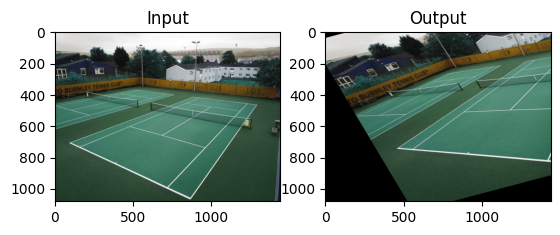

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('testmedia/tennis.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
 
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
M = cv.getAffineTransform(pts1,pts2)
 
dst = cv.warpAffine(img,M,(cols,rows))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

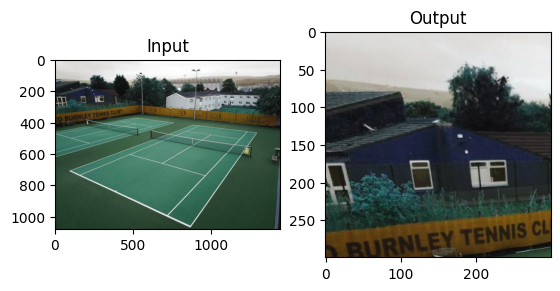

In [5]:
img = cv.imread('testmedia/tennis.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
 
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
 
M = cv.getPerspectiveTransform(pts1,pts2)
 
dst = cv.warpPerspective(img,M,(300,300))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

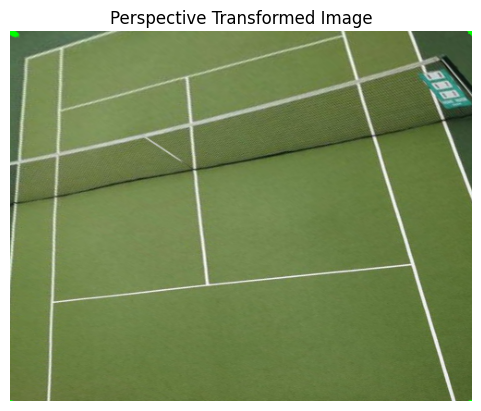

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
paper = cv2.imread('testmedia/tennis.jpg')
assert paper is not None, "Image file could not be read, check with os.path.exists()"

# Coordinates for Perspective Transformation (source points)
pts1 = np.float32([[900,400],[1300,550],[150,700],[750,1000]])

# Coordinates for the transformed (destination) image (output points)
pts2 = np.float32([[0, 0], [500, 0], [0, 400], [500, 400]])

# Draw circles on the original image to visualize the source points
for val in pts1:
    cv2.circle(paper, (int(val[0]), int(val[1])), 5, (0, 255, 0), -1)

# Get the perspective transform matrix
M = cv2.getPerspectiveTransform(pts1, pts2)

# Apply the perspective transformation
dst = cv2.warpPerspective(paper, M, (500, 400))

# Convert the transformed image to RGB format for displaying with matplotlib
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Display the transformed image
plt.imshow(dst_rgb)
plt.title("Perspective Transformed Image")
plt.axis('off')
plt.show()


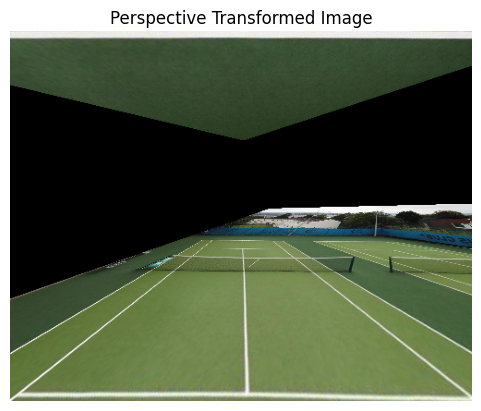

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('testmedia/tennis.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area and take the largest one, assuming it's the document
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Loop over contours to find a rectangular contour
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # If the polygon has 4 corners, we can assume it's our rectangle
    if len(approx) == 4:
        # Order the points for perspective transformation
        pts1 = np.float32([point[0] for point in approx])  # Extract points
        break

# Define the destination points for the transformed image
pts2 = np.float32([[0, 0], [500, 0], [0, 400], [500, 400]])

# Compute the perspective transform matrix
M = cv2.getPerspectiveTransform(pts1, pts2)

# Apply the perspective transformation
warped_image = cv2.warpPerspective(image, M, (500, 400))

# Display the result
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.title("Perspective Transformed Image")
plt.axis("off")
plt.show()


Very good way of doing perspective transformation.

In [7]:
import cv2
import numpy as np

# Initialize list to store points
points = []

# Mouse callback function to capture points
def select_point(event, x, y, flags, param):
    global points
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        print(f"Point selected: {x}, {y}")

# Load the image
image = cv2.imread('tennis2.jpeg')
cv2.imshow("Image", image)

# Set the mouse callback to capture points
cv2.setMouseCallback("Image", select_point)

# Wait until 4 points are selected
while len(points) < 4:
    cv2.waitKey(1)

cv2.destroyAllWindows()

# Convert points to numpy float32 array
pts1 = np.float32(points)
width = 400
height = 600
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

# Get the perspective transform and warp the image
M = cv2.getPerspectiveTransform(pts1, pts2)
warped_image = cv2.warpPerspective(image, M, (width, height))

# Display the transformed image
cv2.imshow("Warped Image", warped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Point selected: 80, 622
Point selected: 910, 635
Point selected: 357, 96
Point selected: 687, 99
